<AxesSubplot: title={'center': 'Histogram of the age variable'}, ylabel='Frequency'>

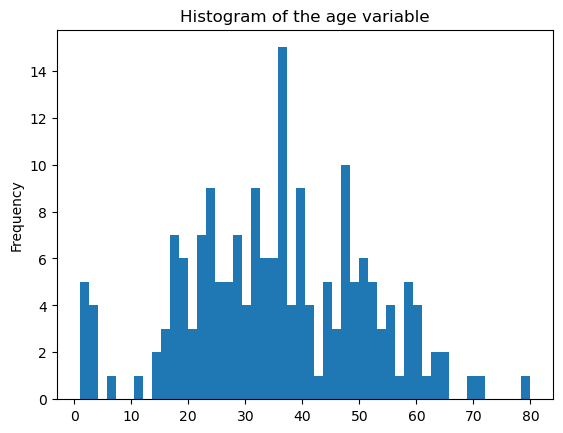

In [1]:

import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')
titanic = titanic.copy()
titanic = titanic.dropna()
titanic['age'].plot.hist(
  bins = 50,
  title = "Histogram of the age variable"
)


<AxesSubplot: xlabel='age', ylabel='fare'>

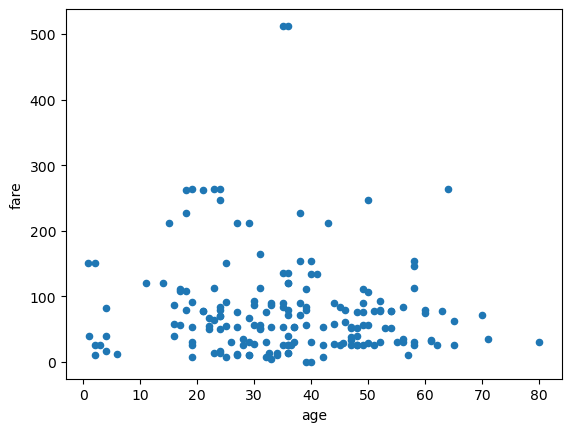

In [2]:

from scipy.stats import zscore
titanic["age_zscore"] = zscore(titanic["age"])
titanic["is_outlier"] = titanic["age_zscore"].apply(
  lambda x: x <= -2.5 or x >= 2.5
)
titanic[titanic["is_outlier"]]


ageAndFare = titanic[["age", "fare"]]
ageAndFare.plot.scatter(x = "age", y = "fare")



<AxesSubplot: xlabel='age', ylabel='fare'>

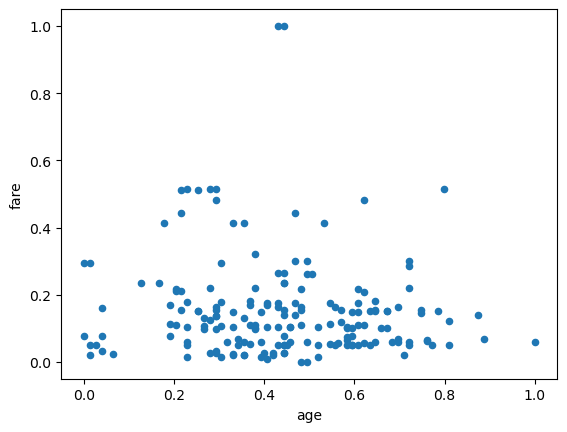

In [3]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ageAndFare = scaler.fit_transform(ageAndFare)
ageAndFare = pd.DataFrame(ageAndFare, columns = ["age", "fare"])
ageAndFare.plot.scatter(x = "age", y = "fare")


In [20]:

from sklearn.cluster import KMeans
outlier_detection = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(ageAndFare)
clusters = outlier_detection.fit_predict(ageAndFare)

clusters


array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0])

<AxesSubplot: xlabel='age', ylabel='fare'>

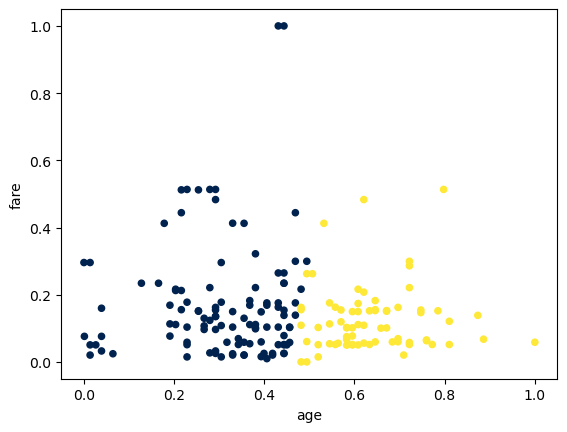

In [21]:

from matplotlib import cm
cmap = cm.get_cmap('cividis')
ageAndFare.plot.scatter(
  x = "age",
  y = "fare",
  c = clusters,
  cmap = cmap,
  colorbar = False
)


In [18]:

from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
  eps = 0.5,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)
clusters = outlier_detection.fit_predict(ageAndFare)

clusters


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

<AxesSubplot: xlabel='age', ylabel='fare'>

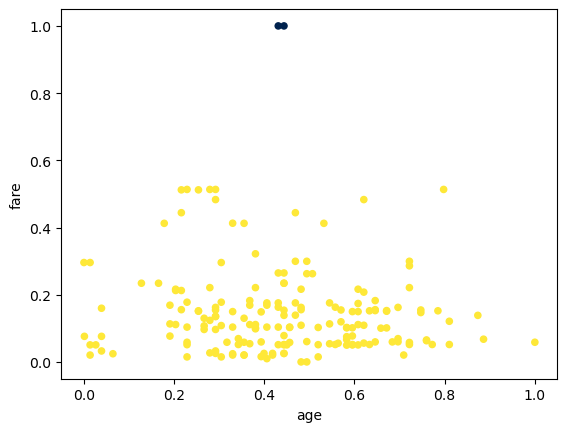

In [15]:

from matplotlib import cm
cmap = cm.get_cmap('cividis')
ageAndFare.plot.scatter(
  x = "age",
  y = "fare",
  c = clusters,
  cmap = cmap,
  colorbar = False
)


In [22]:

from sklearn.cluster import AffinityPropagation
outlier_detection = AffinityPropagation(random_state=5).fit(ageAndFare)
clusters = outlier_detection.fit_predict(ageAndFare)

clusters


array([12, 12, 14,  3,  2,  7,  9,  1, 14,  2, 14,  9,  9,  1, 11,  0,  8,
        8, 11,  1,  7, 14,  8, 12,  8,  7,  8,  2,  2, 11,  3,  3, 11, 14,
        3,  7,  6, 12, 12, 12, 14, 12,  9,  2, 12, 14,  7, 14,  6,  7,  2,
       10,  7,  5,  4,  5, 10,  9,  8,  1,  6,  6,  6,  7,  8, 11,  6,  9,
        6,  3,  1,  9,  8,  2,  8,  8,  1,  6, 10,  9, 12,  7,  9, 11, 10,
        4,  3, 11,  9, 14,  2, 11, 11,  9,  8, 12,  2,  2, 14, 10, 10, 10,
        7, 11,  7, 12, 11, 11,  8, 12, 14, 10, 11, 12, 14,  7, 12,  6,  7,
       10,  2, 14, 11,  6,  3, 11,  2,  8,  0,  9,  8, 14,  2, 14, 11,  9,
       13,  8,  1, 12, 14,  7,  1,  7, 11,  8, 11,  8,  4,  9,  9,  1, 13,
       12,  1,  0,  8,  3, 12,  6, 14,  2,  4,  8,  9, 14, 11, 10,  7, 12,
       14,  9, 12,  8, 11, 11,  9, 11,  7, 14,  8,  9], dtype=int64)

<AxesSubplot: xlabel='age', ylabel='fare'>

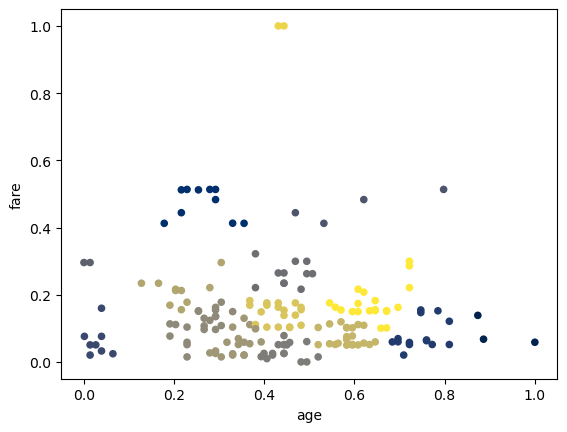

In [23]:

from matplotlib import cm
cmap = cm.get_cmap('cividis')
ageAndFare.plot.scatter(
  x = "age",
  y = "fare",
  c = clusters,
  cmap = cmap,
  colorbar = False
)


In [24]:

from sklearn.cluster import AgglomerativeClustering
outlier_detection = AgglomerativeClustering().fit(ageAndFare)
clusters = outlier_detection.fit_predict(ageAndFare)

clusters


array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0], dtype=int64)

<AxesSubplot: xlabel='age', ylabel='fare'>

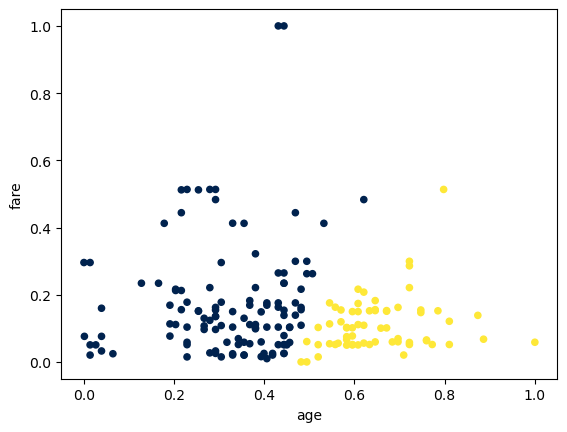

In [25]:

from matplotlib import cm
cmap = cm.get_cmap('cividis')
ageAndFare.plot.scatter(
  x = "age",
  y = "fare",
  c = clusters,
  cmap = cmap,
  colorbar = False
)


In [27]:

from sklearn.cluster import Birch
outlier_detection = Birch(n_clusters=None)
clusters = outlier_detection.fit_predict(ageAndFare)

clusters


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

<AxesSubplot: xlabel='age', ylabel='fare'>

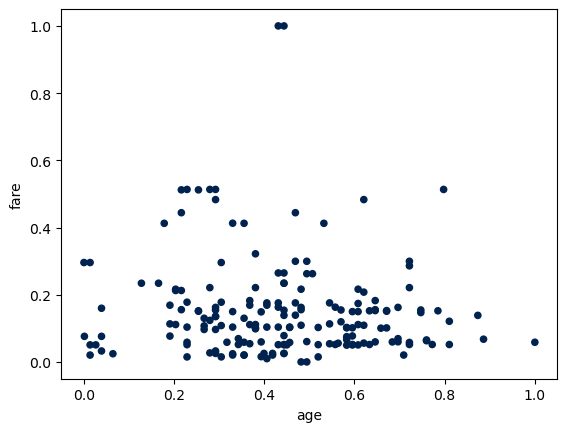

In [28]:

from matplotlib import cm
cmap = cm.get_cmap('cividis')
ageAndFare.plot.scatter(
  x = "age",
  y = "fare",
  c = clusters,
  cmap = cmap,
  colorbar = False
)


In [30]:

from sklearn.cluster import MeanShift
outlier_detection = MeanShift(bandwidth=2).fit(ageAndFare)
clusters = outlier_detection.fit_predict(ageAndFare)

clusters


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

<AxesSubplot: xlabel='age', ylabel='fare'>

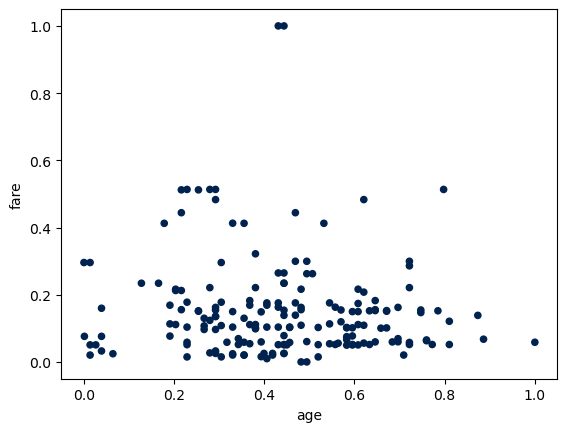

In [31]:

from matplotlib import cm
cmap = cm.get_cmap('cividis')
ageAndFare.plot.scatter(
  x = "age",
  y = "fare",
  c = clusters,
  cmap = cmap,
  colorbar = False
)


In [32]:

from sklearn.cluster import OPTICS
outlier_detection = OPTICS(min_samples=2).fit(ageAndFare)
clusters = outlier_detection.fit_predict(ageAndFare)

clusters


C:\Users\ryans\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
C:\Users\ryans\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


array([ 0, -1, 37, 50, 34,  8, 10, 48, 28, 44, 27, 12, 13, 47, -1, -1, 16,
       19, 25, -1,  9, 30, 39,  4, 18,  6, 16, 36, 33, -1, 50, 50, 22, 45,
       50, -1, -1,  2,  0,  1, 27,  4, 12, 36,  3, 29, 32, 45, 41,  6, 44,
       20,  7, 52, 51, 52, 21,  5, 18, 48, -1, 43, 41,  7, 35, 22, 42,  5,
       43, 50, 47, 13, 15, 44, 17, 14, 46, 40, -1, 13,  2,  9, 10, 26, 38,
       -1, 50, -1, 10, -1, -1, 23, 24, 13, -1,  1, 34, 33, 30, -1, 20, 21,
        6, 24,  8,  3, -1, 22, 15, -1, 31, 21, 24,  0, 37,  6, -1, -1,  6,
       20, 44, 29, 26, 42, 50, -1, 36, 19, -1, 10, 17, 28, 33, -1, 23,  5,
       53, -1, 49,  5, 31, 32, 49,  6, -1, 14, 25, 39, 51, 11, -1, 46, 53,
       -1, -1, -1, 35, 50,  2, 40, 29, -1, 51, 35, 10, 27, 23, 38, 32, -1,
       -1, 11,  0, 35, -1, 23,  5, 25,  9, -1, 39, 10])

<AxesSubplot: xlabel='age', ylabel='fare'>

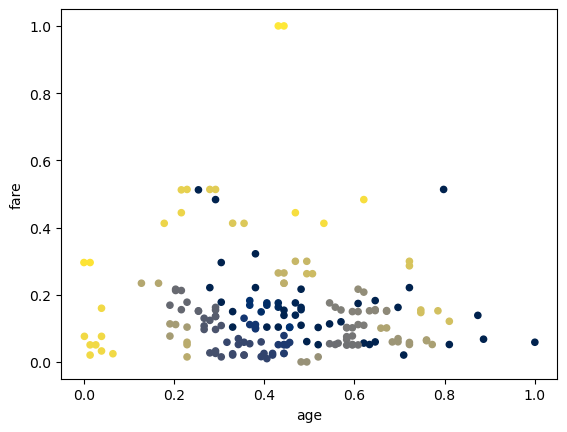

In [33]:

from matplotlib import cm
cmap = cm.get_cmap('cividis')
ageAndFare.plot.scatter(
  x = "age",
  y = "fare",
  c = clusters,
  cmap = cmap,
  colorbar = False
)


In [34]:

from sklearn.cluster import SpectralClustering
outlier_detection = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0).fit(ageAndFare)
clusters = outlier_detection.fit_predict(ageAndFare)

clusters


array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1], dtype=int64)

<AxesSubplot: xlabel='age', ylabel='fare'>

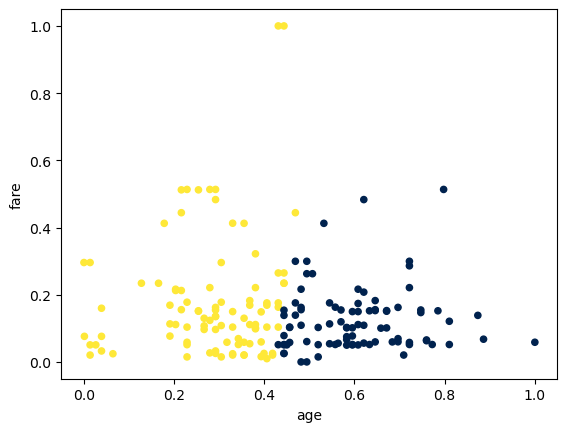

In [35]:

from matplotlib import cm
cmap = cm.get_cmap('cividis')
ageAndFare.plot.scatter(
  x = "age",
  y = "fare",
  c = clusters,
  cmap = cmap,
  colorbar = False
)
